In [109]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [110]:
ca = pd.read_csv('dogma4.csv')
ca.head(12)

,0.0.4,1.0,1.0.1,0.0.10,1.0.2,1.0.3,0.0.56,3.0,0.0.63,1.0.6,...,1.0580152671755725,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552
0,NaN,1.0,1.0,NaN,1.0,1.0,6.0,6.0,2.0,2.0,...,1.0,5903704.0,5903704.0,5903704.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN,1.0,...,1.0,6522297.0,6394748.0,6456499.0,275.0,272.0,273.0,7062679.0,6920072.0,6989575.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,6522297.0,6394748.0,6456499.0,275.0,272.0,273.0,7062679.0,6920072.0,6989575.0
3,NaN,4.0,4.0,NaN,4.0,4.0,3.0,3.0,1.0,1.0,...,1.0,6522297.0,6394748.0,6456499.0,275.0,272.0,273.0,7062679.0,6920072.0,6989575.0
4,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,1.0,10850000.0,10850000.0,10850000.0,362.0,362.0,362.0,10850000.0,10850000.0,10850000.0
5,NaN,3.0,3.0,NaN,3.0,3.0,3.0,6.0,1.0,2.0,...,1.0,6522297.0,6394748.0,6456499.0,275.0,272.0,273.0,7062679.0,6920072.0,6989575.0
6,NaN,1.0,1.0,NaN,1.0,1.0,NaN,4.0,NaN,NaN,...,1.0,6522297.0,6394748.0,6456499.0,275.0,272.0,273.0,7062679.0,6920072.0,6989575.0
7,NaN,1.0,1.0,NaN,1.0,1.0,10.0,10.0,4.0,4.0,...,1.0,6522297.0,6394748.0,6456499.0,275.0,272.0,273.0,7062679.0,6920072.0,6989575.0
8,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,NaN,1.0,...,1.0,6522297.0,6394748.0,6456499.0,275.0,272.0,273.0,7062679.0,6920072.0,6989575.0
9,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,1.0,...,1.0,4818792.0,4818792.0,4818792.0,240.0,240.0,240.0,4818792.0,4818792.0,4818792.0


In [111]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0.0.4               4528 non-null   float64
 1   1.0                 8178 non-null   float64
 2   1.0.1               8630 non-null   float64
 3   0.0.10              4528 non-null   float64
 4   1.0.2               8177 non-null   float64
 5   1.0.3               8630 non-null   float64
 6   0.0.56              5605 non-null   float64
 7   3.0                 8622 non-null   float64
 8   0.0.63              5226 non-null   float64
 9   1.0.6               8364 non-null   float64
 10  0.0.70              5417 non-null   float64
 11  1.0.7               8568 non-null   float64
 12  8257086.3334710505  8581 non-null   float64
 13  174216.020045599    8309 non-null   float64
 14  2857113.4190010633  8581 non-null   float64
 15  6656046.7           8630 non-null   float64
 16  10000.

In [112]:
for column in ca.columns:
    # Преобразуем столбцы, чтобы заменить все нечисловые значения на 0
    ca[column] = pd.to_numeric(ca[column], errors='coerce').fillna(0)

# Округляем все числа до целых
ca = ca.round(0).astype(int)

In [ ]:
for column in ca.columns:
    if column != 'target':  # Не трогаем столбец 'target'
        ca[column] = ca[column].replace(0, np.nan)

# Явно приводим все столбцы (кроме 'target') к типу float, чтобы работать с NaN
ca = ca.astype({col: 'float64' for col in ca.columns if col != 'target'})

# Если нужно вернуть столбцы с целочисленными значениями (без NaN), преобразуем их обратно в int
# (это сделаем только для тех столбцов, где NaN уже заменены, и если это необходимо)
ca = ca.fillna(0).astype({col: 'int64' for col in ca.columns if col != 'target'})

ca.to_csv('dogma4', index=False)

In [114]:
threshold = 0.52
ca = ca.loc[:, ca.isnull().mean(axis=0) < threshold]

In [115]:
threshold = 0.52
ca = ca[ca.isnull().mean(axis=1) < threshold]

In [116]:
ca.head(8)

,0.0.4,1.0,1.0.1,0.0.10,1.0.2,1.0.3,0.0.56,3.0,0.0.63,1.0.6,...,1.0580152671755725,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552
0,0,1,1,0,1,1,6,6,2,2,...,1,5903704,5903704,5903704,362,362,362,7616803,7616803,7616803
1,1,1,1,1,1,1,0,2,0,1,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
2,1,1,1,1,1,1,1,1,1,1,...,0,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
3,0,4,4,0,4,4,3,3,1,1,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
4,1,1,1,1,1,1,3,3,1,1,...,1,10850000,10850000,10850000,362,362,362,10850000,10850000,10850000
5,0,3,3,0,3,3,3,6,1,2,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
6,0,1,1,0,1,1,0,4,0,0,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
7,0,1,1,0,1,1,10,10,4,4,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575


<Figure size 1000x100 with 0 Axes>

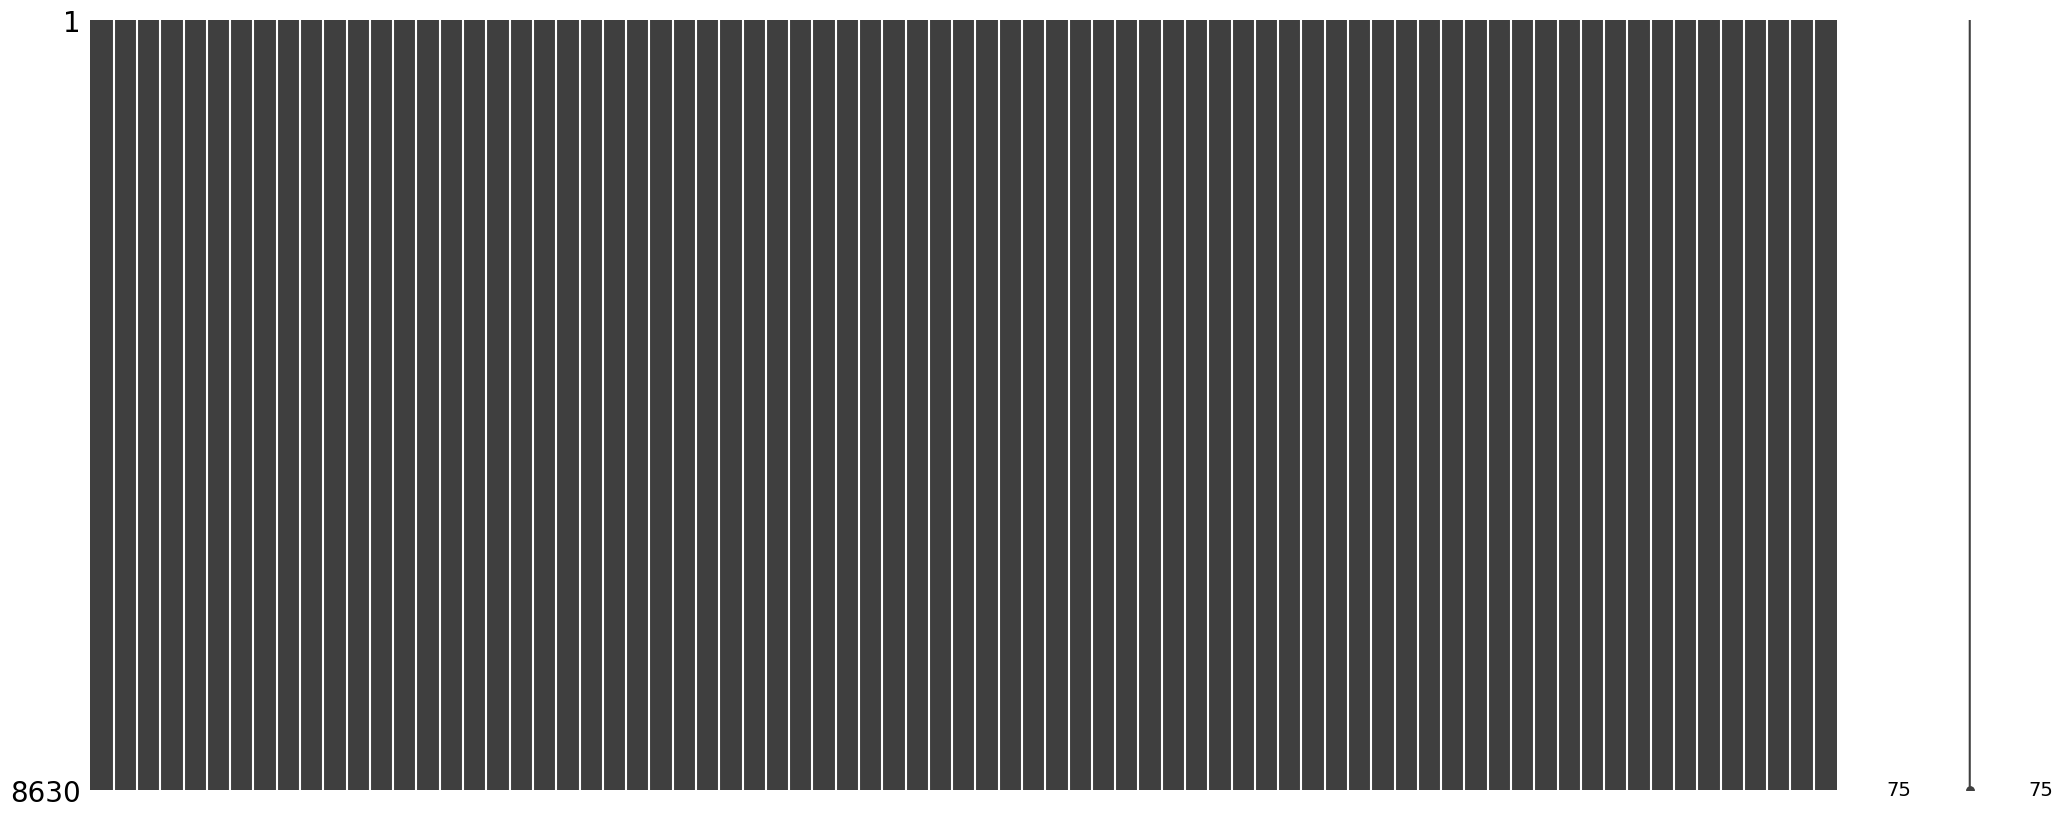

In [117]:
plt.figure(figsize=(10, 1))
msno.matrix(ca)
plt.show()

In [118]:
unique_columns = ca.T.drop_duplicates().T



In [119]:
unique_columns = ca.T.drop_duplicates().T

# Перезапись файла
unique_columns.to_csv('dogma4.csv', index=False)

In [120]:
#numeric_cols = ca.select_dtypes(include='number').columns  # Выбираем только числовые столбцы
#ca[numeric_cols] = ca[numeric_cols].fillna(ca[numeric_cols].mean())  # Заполняем пустые значения средним

# Перезапись файла

#ca.drop(ca.columns[:2], axis=1, inplace=True)
ca.isnull().sum()
ca.to_csv('dogma4.csv', index=False)

<Figure size 1000x100 with 0 Axes>

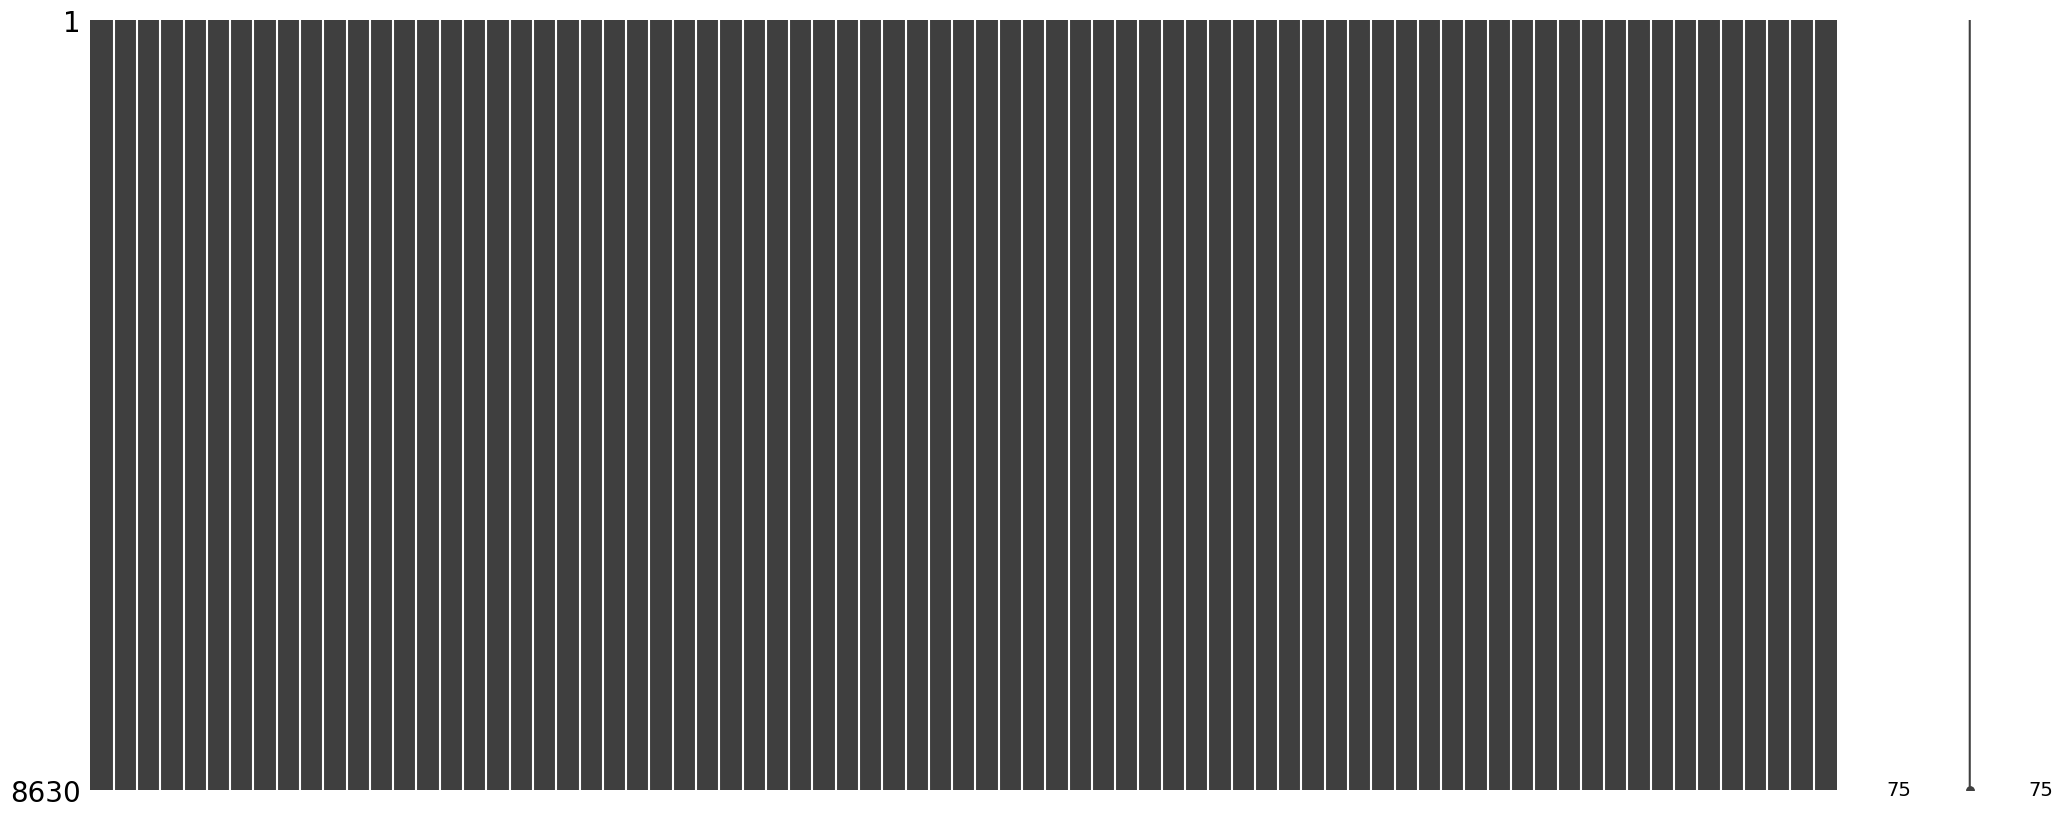

In [121]:
plt.figure(figsize=(10, 1))
msno.matrix(ca)
plt.show()

In [122]:
ca.head(8)

,0.0.4,1.0,1.0.1,0.0.10,1.0.2,1.0.3,0.0.56,3.0,0.0.63,1.0.6,...,1.0580152671755725,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552
0,0,1,1,0,1,1,6,6,2,2,...,1,5903704,5903704,5903704,362,362,362,7616803,7616803,7616803
1,1,1,1,1,1,1,0,2,0,1,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
2,1,1,1,1,1,1,1,1,1,1,...,0,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
3,0,4,4,0,4,4,3,3,1,1,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
4,1,1,1,1,1,1,3,3,1,1,...,1,10850000,10850000,10850000,362,362,362,10850000,10850000,10850000
5,0,3,3,0,3,3,3,6,1,2,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
6,0,1,1,0,1,1,0,4,0,0,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
7,0,1,1,0,1,1,10,10,4,4,...,1,6522297,6394748,6456499,275,272,273,7062679,6920072,6989575
